# MORDM

In [1]:
# Import general python packages
import pandas as pd
import numpy as np
import seaborn as sns
import copy

# Import functions
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation
from problem_formulation import sum_over, sum_over_time

# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Scenario,
                           Constraint, ScalarOutcome)
from ema_workbench.util import ema_logging
from ema_workbench import save_results, load_results
from ema_workbench.em_framework.optimization import (EpsilonProgress)

In [2]:
# Loading in all the 17 objectives via predefined problem formulation 3
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)
    dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
# Replicate the objectives
for outcome in dike_model.outcomes:
    print(repr(outcome))
    

ArrayOutcome('A.1_Expected Annual Damage')
ArrayOutcome('A.1_Expected Number of Deaths')
ArrayOutcome('A.2_Expected Annual Damage')
ArrayOutcome('A.2_Expected Number of Deaths')
ArrayOutcome('A.3_Expected Annual Damage')
ArrayOutcome('A.3_Expected Number of Deaths')
ArrayOutcome('A.4_Expected Annual Damage')
ArrayOutcome('A.4_Expected Number of Deaths')
ArrayOutcome('A.5_Expected Annual Damage')
ArrayOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('All Costs', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x0000015D644B2840>)


In [30]:
# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor):
   
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE
    
    model.uncertainties = uncertainties
    model.levers = levers
    
    # Creating a list to sum over to achieve total costs
    cost_variables = []
    cost_variables.extend(
    [
        f"{dike}_{e}"
        for e in ["Expected Annual Damage", "Dike Investment Costs"]
        for dike in function.dikelist
    ])
    cost_variables.extend([f"RfR Total Costs"])
    cost_variables.extend([f"Expected Evacuation Costs"])
    
    if problem_formulation_actor == 4: #RWS
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage',
                            variable_name=['{}_Expected Annual Damage'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction),

            ScalarOutcome('Total Investment Costs',
                            variable_name=['{}_Dike Investment Costs'.format(dike)
                                                for dike in function.dikelist] + ['RfR Total Costs'
                                                                                ] + ['Expected Evacuation Costs'],
                            function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths',
                            variable_name=['{}_Expected Number of Deaths'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction)] 
    
    elif problem_formulation_actor == 5: # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A1-4',
                            variable_name=['A.1_Expected Annual Damage' ,'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=sum_over, kind=direction),

            ScalarOutcome('Investment Costs A1-4',
                            variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths in A1-4',
                            variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=sum_over, kind=direction)]
    
    elif problem_formulation_actor == 6: # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A4', variable_name='A.4_Expected Annual Damage', function = sum_over, kind=direction),
            ScalarOutcome('Expected Annual Damage A5', variable_name='A.5_Expected Annual Damage', function = sum_over, kind=direction),            
            ScalarOutcome('Expected Number of Deaths in A4', variable_name='A.4_Expected Number of Deaths',function = sum_over, kind=direction),
            ScalarOutcome('Expected Number of Deaths in A5', variable_name='A.5_Expected Number of Deaths',function = sum_over, kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function = sum_over, kind=direction),
            ScalarOutcome('Aggregated Expected Number of Deaths A1-A3', 
                          variable_name=['A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'], function = sum_over, kind=direction)]
    
    else:
        raise TypeError('unknown identifier')
    return model

In [31]:
# Replicate the uncertainties
uncertainties = dike_model.uncertainties
uncertainties = copy.deepcopy(dike_model.uncertainties)

In [32]:
levers = dike_model.levers 
levers = copy.deepcopy(dike_model.levers)

In [53]:
model = problem_formulation_actor(6)
for outcome in model.outcomes:
    print(repr((outcome)))

ScalarOutcome('Expected Annual Damage A4', variable_name=('A.4_Expected Annual Damage',), function=<function sum_over at 0x0000015D644B2840>)
ScalarOutcome('Expected Annual Damage A5', variable_name=('A.5_Expected Annual Damage',), function=<function sum_over at 0x0000015D644B2840>)
ScalarOutcome('Expected Number of Deaths in A4', variable_name=('A.4_Expected Number of Deaths',), function=<function sum_over at 0x0000015D644B2840>)
ScalarOutcome('Expected Number of Deaths in A5', variable_name=('A.5_Expected Number of Deaths',), function=<function sum_over at 0x0000015D644B2840>)
ScalarOutcome('Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_ove

In [34]:
print(len(model.outcomes))

5


In [35]:
for outcome in dike_model.outcomes:
    print(repr(outcome))

ArrayOutcome('A.1_Expected Annual Damage')
ArrayOutcome('A.1_Expected Number of Deaths')
ArrayOutcome('A.2_Expected Annual Damage')
ArrayOutcome('A.2_Expected Number of Deaths')
ArrayOutcome('A.3_Expected Annual Damage')
ArrayOutcome('A.3_Expected Number of Deaths')
ArrayOutcome('A.4_Expected Annual Damage')
ArrayOutcome('A.4_Expected Number of Deaths')
ArrayOutcome('A.5_Expected Annual Damage')
ArrayOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('All Costs', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x0000015D644B2840>)


In [36]:
reference_values = {
    "Bmax": 175,
    "Brate": 1.5,
    "pfail": 0.5,
    "ID flood wave shape": 4,
    "planning steps": 2,
}
reference_values.update({f"discount rate {n}": 3.5 for n in planning_steps})
refcase_scen = {}

for key in dike_model.uncertainties:
    name_split = key.name.split('_')
    if len(name_split) == 1:

        refcase_scen.update({key.name: reference_values[key.name]})
    else:
        refcase_scen.update({key.name: reference_values[name_split[1]]})
            
ref_scenario = Scenario('reference', **refcase_scen)

In [50]:
convergence_metrics = {EpsilonProgress()}
constraint = [Constraint("Total Costs", outcome_names="Total Costs", function=lambda x: max(0, x - 1000000000))]

with MultiprocessingEvaluator(model,n_processes=-1) as evaluator:
   results2 = evaluator.optimize(nfe=5, searchover='levers',
                                 convergence=convergence_metrics,
                                 epsilons=[1]*len(model.outcomes), reference=ref_scenario,
                                 constraints=constraint)

save_results(results2, 'Experiments/Week23_MORDM_Reference_1000_PD6.tar.gz')


[MainProcess/INFO] pool started with 3 workers





  0%|                                                    | 0/5 [00:00<?, ?it/s]




100it [00:39,  2.53it/s]                                                       
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool


KeyError: 'epsilon_progress'

In [51]:
y,t = results2

In [52]:
y

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage A4,Expected Annual Damage A5,Expected Number of Deaths in A4,Expected Number of Deaths in A5,Total Costs
0,1,0,0,0,0,0,0,0,0,0,...,7,3,3,8,1,0.0,0.0,0.0,0.0,7.917692e+08


### Worst Case

In [18]:
# Worst case specification
worstcase_values ={
    "Bmax": 175,
    "Brate": 1.5,
    "pfail": 0.9,
    "ID flood wave shape": 4,
    "planning steps": 2,
}
worstcase_values.update({f"discount rate {n}": 3.5 for n in planning_steps})

worstcase_scen = {}

for key in dike_model.uncertainties:
    name_split = key.name.split('_')
    if len(name_split) == 1:

        worstcase_scen.update({key.name: worstcase_values[key.name]})
    else:
        worstcase_scen.update({key.name: worstcase_values[name_split[1]]})
            
worst_scenario = Scenario('reference', **worstcase_scen)

In [21]:
#convergence_metrics = {EpsilonProgress()}

#with MultiprocessingEvaluator(model,n_processes=-1) as evaluator:
  #  results3 = evaluator.optimize(nfe=4000, searchover='levers',
     #                            convergence=convergence_metrics,
      #                           epsilons=[0.01]*len(model.outcomes), reference=worst_scenario)

#save_results(results2, 'Experiments/Week23_MORDM_Reference_1000_PD6.tar.gz')


[MainProcess/INFO] pool started with 3 workers

 65%|███████████████████████▌            | 3267/5000 [1:02:42<33:15,  1.15s/it]

 99%|█████████████████████████████████████▍| 3944/4000 [32:23<00:23,  2.41it/s]
4033it [33:11,  2.03it/s]                                                      
[MainProcess/INFO] optimization completed, found 4 solutions
[MainProcess/INFO] terminating pool


In [23]:
worst_case.to_csv('MODRM_WC.csv')

In [22]:
# Selecting the policies that are proposed as solutions for further robustness tests
from ema_workbench import Policy

worstcase_policies_to_evaluate = []

for i, policy in import_worst_case.iterrows():
    worstcase_policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [23]:
n_scenarios = 2000
#with MultiprocessingEvaluator(model) as evaluator:
 #   worst_results = evaluator.perform_experiments(n_scenarios,
  #                                          worstcase_policies_to_evaluate)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 2000 scenarios * 4 policies * 1 model(s) = 8000 experiments
100%|██████████████████████████████████████| 8000/8000 [46:07<00:00,  2.89it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [24]:
save_results(worst_results, 'Week23_worst_case_2000_4.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Gebruiker\OneDrive - Delft University of Technology\EPA\Q4 Model based decision making\epa141A_open\final assignment\Week23_worst_case_2000_4.tar.gz


### Reference case

In [25]:
reference_case_re = pd.read_csv('MODRM_DF.csv')

In [26]:
# Selecting the policies that are proposed as solutions for further robustness tests
from ema_workbench import Policy

refercase_policies_to_evaluate = []

for i, policy in reference_case_re.iterrows():
    refercase_policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [27]:
n_scenarios = 2000
with MultiprocessingEvaluator(model) as evaluator:
    reference_policies_results = evaluator.perform_experiments(n_scenarios,
                                            refercase_policies_to_evaluate)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 2000 scenarios * 6 policies * 1 model(s) = 12000 experiments
100%|██████████████████████████████████| 12000/12000 [1:32:16<00:00,  2.17it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [28]:
save_results(reference_policies_results, 'Week23_reference_case_2000_6.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Gebruiker\OneDrive - Delft University of Technology\EPA\Q4 Model based decision making\epa141A_open\final assignment\Week23_reference_case_2000_6.tar.gz


# MODRM GRAPHS


In [90]:
import pandas as pd

# Correct way to read a CSV file into a DataFrame
rf_policy_set= pd.read_csv('MODRM_DF.csv')


In [94]:
rf_policy_set

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage A4,Expected Annual Damage A5,Expected Number of Deaths in A4,Expected Number of Deaths in A5,Total Costs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.448132e+08
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000e+00,1.314588e+07,0.000000,0.005199,1.329241e+08
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000e+00,1.314588e+07,0.000000,0.014442,1.329219e+08
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.739687e+06,1.314588e+07,0.002763,0.014442,1.313407e+08
4,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,4.739687e+06,0.000000e+00,0.002763,0.000000,1.432321e+08
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.739687e+06,1.314588e+07,0.000995,0.005199,1.313432e+08


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

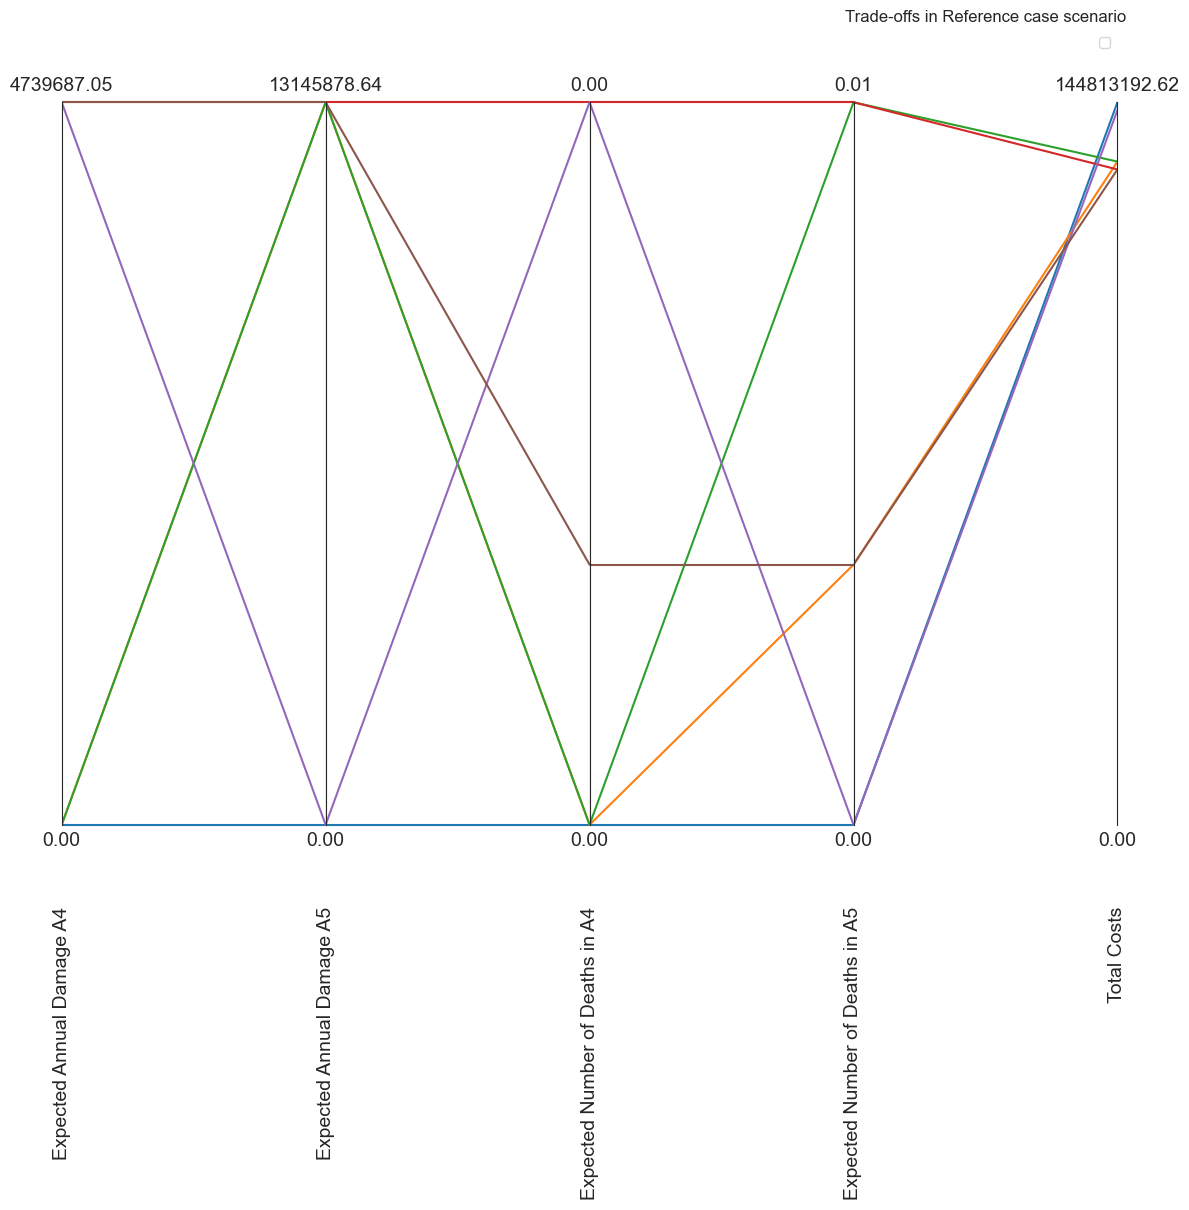

In [105]:
from ema_workbench.analysis import parcoords

ref_data = rf_policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(ref_data)
ref_limits.loc[0, ['Expected Annual Damage A4', 'Expected Annual Damage A5','Expected Number of Deaths in A5', 'Expected Number of Deaths in A4', 'Total Costs']] = 0

paraxes = parcoords.ParallelAxes(ref_limits)
paraxes.plot(ref_data)
plt.title('Trade-offs in Reference case scenario')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

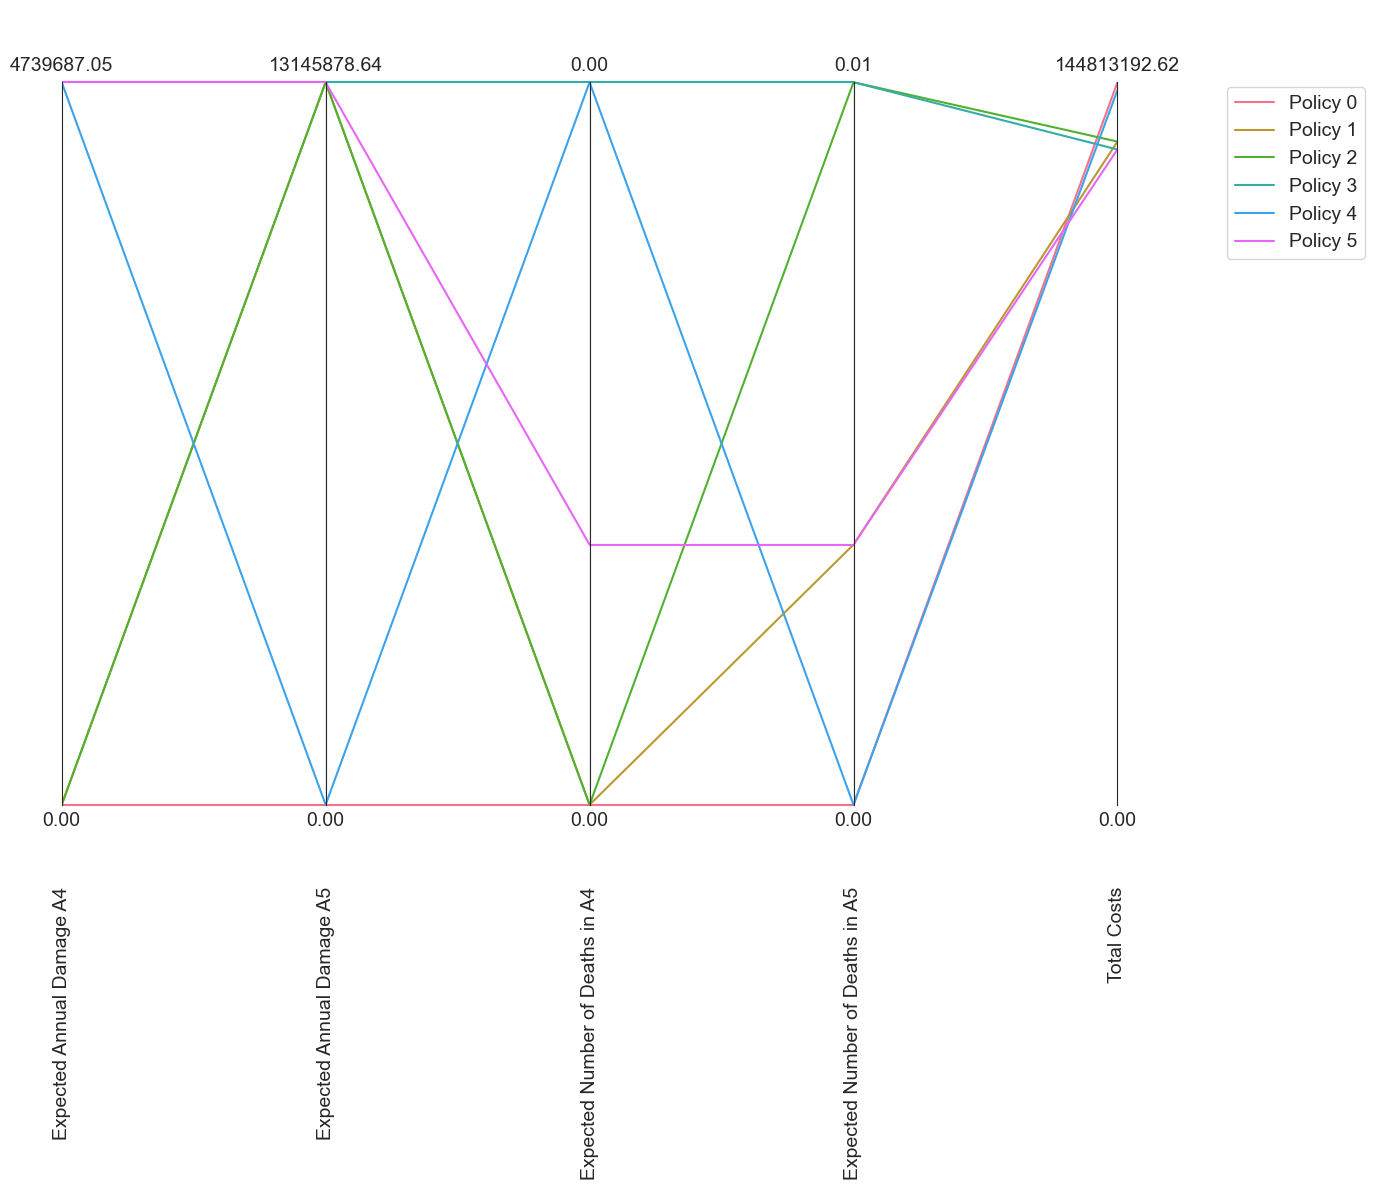

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import parcoords

# Assuming WC_policy_set and model are already defined
ref_data = rf_policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(ref_data)
ref_limits.loc[0, ['Expected Annual Damage A4', 'Expected Annual Damage A5',
                   'Expected Number of Deaths in A5', 'Expected Number of Deaths in A4', 'Total Costs']] = 0

# Create a ParallelAxes object
paraxes = parcoords.ParallelAxes(ref_limits)

# Generate a color palette
colors = sns.color_palette('husl', len(rf_policy_set))

# Plot each policy individually with a corresponding color and label
for i, (index, row) in enumerate(rf_policy_set.iterrows()):
    outcomes = row.loc[['Expected Annual Damage A4', 'Expected Annual Damage A5',
                        'Expected Number of Deaths in A5', 'Expected Number of Deaths in A4', 'Total Costs']]
    paraxes.plot(outcomes.to_frame().T, color=colors[i], label=f'Policy {index}')

# Add a legend to the plot
paraxes.legend()


In [109]:
import pandas as pd

# Correct way to read a CSV file into a DataFrame
WC_policy_set= pd.read_csv('MODRM_WC.csv')


In [110]:
WC_policy_set

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage A4,Expected Annual Damage A5,Expected Number of Deaths in A4,Expected Number of Deaths in A5,Total Costs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.000000,0.000000e+00,0.00000,0.000000,6.817480e+07
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,2.155351e+06,0.00000,0.000365,3.898552e+07
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,866300.670208,0.000000e+00,0.00009,0.000000,6.453596e+07
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0.000000,7.184503e+05,0.00000,0.000122,6.512677e+07


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

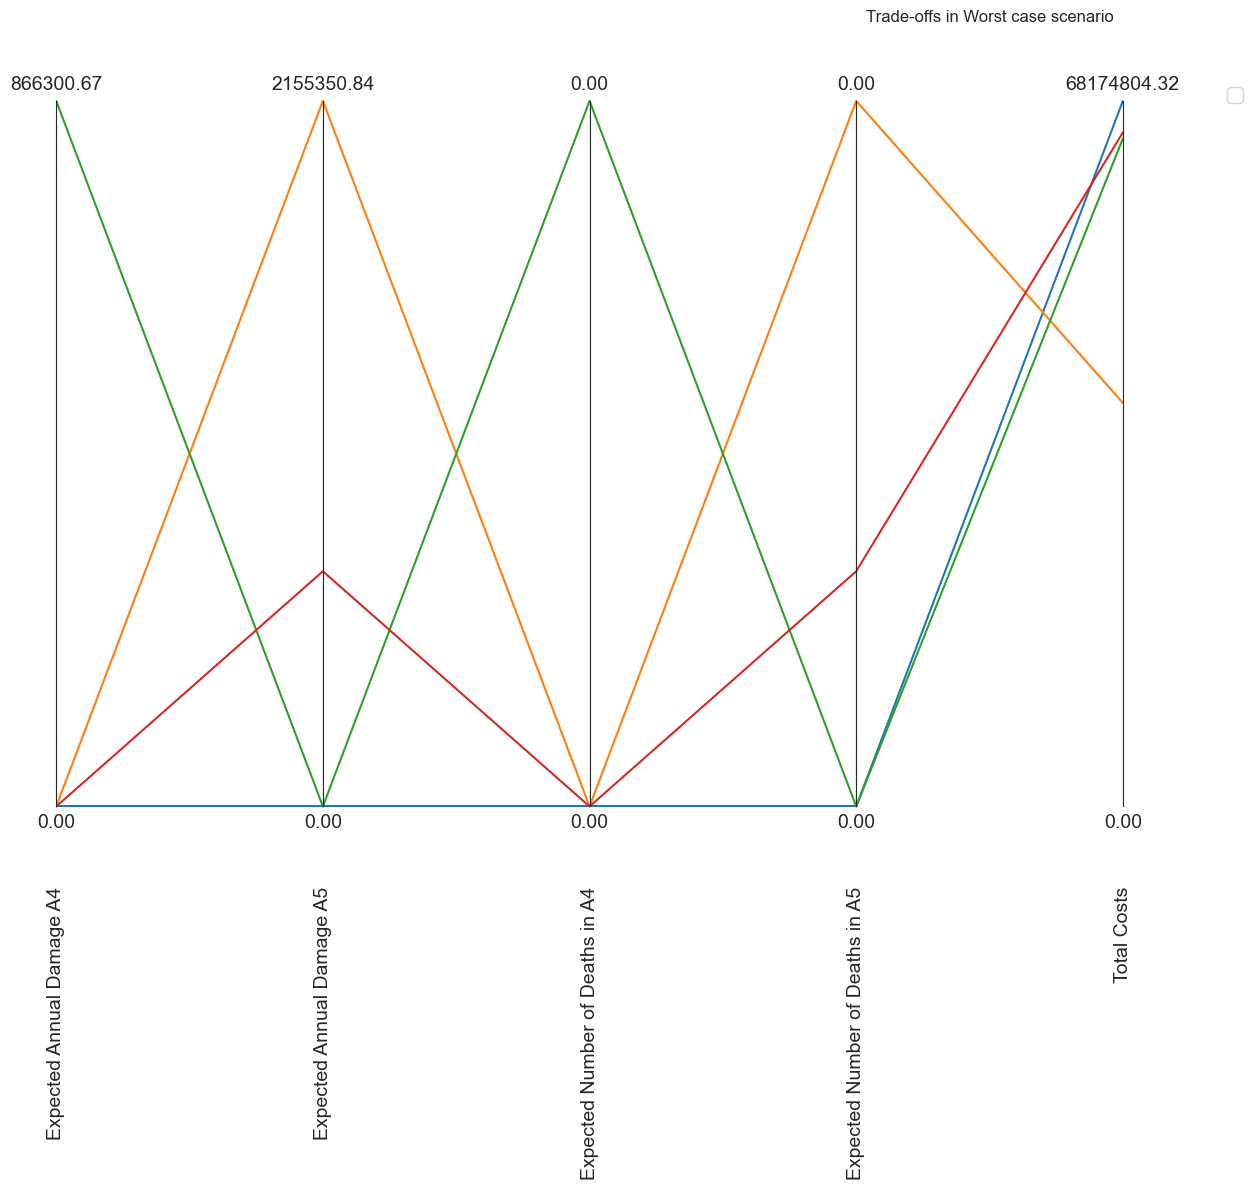

In [125]:
from ema_workbench.analysis import parcoords

ref_data = WC_policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(ref_data)
ref_limits.loc[0, ['Expected Annual Damage A4', 'Expected Annual Damage A5','Expected Number of Deaths in A5', 'Expected Number of Deaths in A4', 'Total Costs']] = 0

paraxes = parcoords.ParallelAxes(ref_limits)
paraxes.plot(ref_data)
plt.title('Trade-offs in Worst case scenario')
paraxes.legend()
# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()



C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

<Figure size 1200x1200 with 0 Axes>

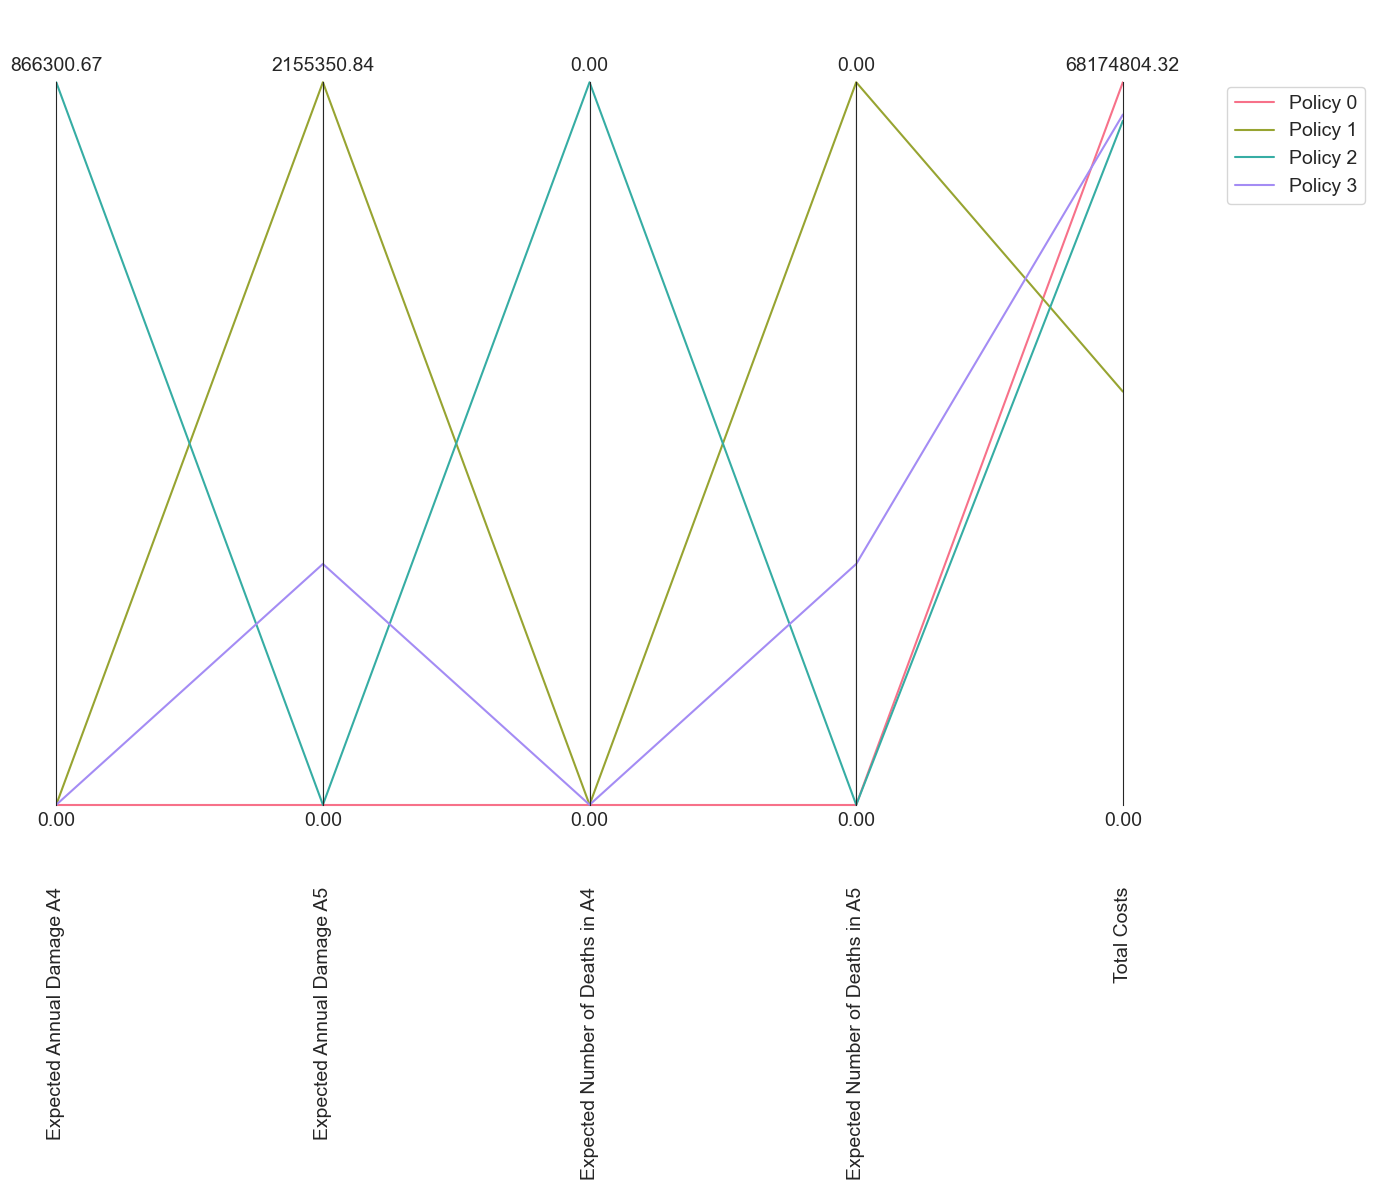

<Figure size 1200x1200 with 0 Axes>

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import parcoords

# Assuming WC_policy_set and model are already defined
ref_data = WC_policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(ref_data)
ref_limits.loc[0, ['Expected Annual Damage A4', 'Expected Annual Damage A5',
                   'Expected Number of Deaths in A5', 'Expected Number of Deaths in A4', 'Total Costs']] = 0

# Create a ParallelAxes object
paraxes = parcoords.ParallelAxes(ref_limits)

# Generate a color palette
colors = sns.color_palette('husl', len(WC_policy_set))

# Plot each policy individually with a corresponding color and label
for i, (index, row) in enumerate(WC_policy_set.iterrows()):
    outcomes = row.loc[['Expected Annual Damage A4', 'Expected Annual Damage A5',
                        'Expected Number of Deaths in A5', 'Expected Number of Deaths in A4', 'Total Costs']]
    paraxes.plot(outcomes.to_frame().T, color=colors[i], label=f'Policy {index}')

# Add a legend to the plot
paraxes.legend()

# Set the figure size
plt.figure(figsize=(12, 12))



# PRIM

In [136]:
rf_em = load_results('Week23_reference_case_2000_6.tar.gz')

[MainProcess/INFO] results loaded successfully from C:\Users\Gebruiker\OneDrive - Delft University of Technology\EPA\Q4 Model based decision making\epa141A_open\final assignment\Week23_reference_case_2000_6.tar.gz


In [140]:
experiments_rfem, outcomes_rfem = rf_em

In [172]:
experiments_rfem[:, 

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,114,328.682725,1.5,0.713485,139.532438,1.0,0.515097,228.360825,10.0,0.865021,...,0,1,0,0,1,0,0,2000,0,dikesnet
1,18,271.151740,10.0,0.041304,43.558330,10.0,0.133565,202.056870,1.0,0.096704,...,0,1,0,0,1,0,0,2001,0,dikesnet
2,90,197.650243,1.0,0.740644,62.931004,1.0,0.054134,109.606651,1.0,0.293149,...,0,1,0,0,1,0,0,2002,0,dikesnet
3,95,267.976883,1.0,0.783014,66.409068,10.0,0.472811,230.959702,1.0,0.818138,...,0,1,0,0,1,0,0,2003,0,dikesnet
4,23,44.151139,1.5,0.419052,55.031186,1.0,0.080026,233.709638,1.5,0.976588,...,0,1,0,0,1,0,0,2004,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,32,109.898647,10.0,0.220167,138.864127,1.0,0.539569,169.620790,1.5,0.436351,...,0,0,0,0,0,0,0,3995,5,dikesnet
11996,103,265.025510,1.5,0.443085,49.628131,1.0,0.562165,84.138305,1.5,0.799322,...,0,0,0,0,0,0,0,3996,5,dikesnet
11997,34,108.275372,1.0,0.593292,346.476214,1.5,0.217539,163.567916,1.5,0.965051,...,0,0,0,0,0,0,0,3997,5,dikesnet
11998,73,281.357288,1.5,0.907884,175.526513,1.0,0.825676,335.324553,1.5,0.084136,...,0,0,0,0,0,0,0,3998,5,dikesnet


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2148\227692839.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outcomes = outcomes_df.groupby('policy').mean()


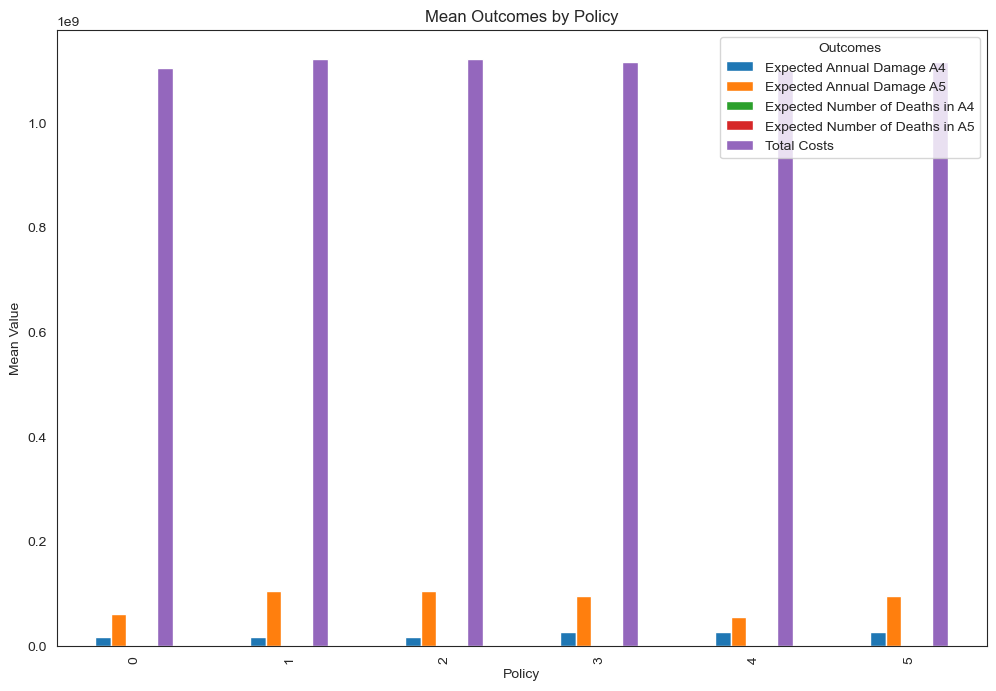

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming outcomes_rfem is a tuple containing a DataFrame and a dictionary
experiments_df, outcomes_dict = rf_em

# Extract the policy data
policies = experiments_df['policy']

# Create a DataFrame from the outcomes dictionary and add the policy column
outcomes_df = pd.DataFrame(outcomes_dict)
outcomes_df['policy'] = policies.values

# Calculate the mean of each outcome for each policy
mean_outcomes = outcomes_df.groupby('policy').mean()

# Plot the mean outcomes against the policies
mean_outcomes.plot(kind='bar', figsize=(12, 8))
plt.title('Mean Outcomes by Policy')
plt.xlabel('Policy')
plt.ylabel('Mean Value')
plt.legend(title='Outcomes')
plt.show()


In [176]:
policiess = experiments_rfem.iloc[:,19:]
policiess

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2000,0,dikesnet
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2001,0,dikesnet
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2002,0,dikesnet
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2003,0,dikesnet
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2004,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3995,5,dikesnet
11996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3996,5,dikesnet
11997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3997,5,dikesnet
11998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3998,5,dikesnet


In [179]:
scenaaa =experiments_rfem.iloc[:,:19]
scenaaa

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,114,328.682725,1.5,0.713485,139.532438,1.0,0.515097,228.360825,10.0,0.865021,313.769757,1.5,0.854691,197.746061,1.5,0.001669,3.5,2.5,4.5
1,18,271.151740,10.0,0.041304,43.558330,10.0,0.133565,202.056870,1.0,0.096704,322.885644,1.5,0.522520,150.485413,1.0,0.554581,2.5,4.5,4.5
2,90,197.650243,1.0,0.740644,62.931004,1.0,0.054134,109.606651,1.0,0.293149,50.001645,1.5,0.292514,261.540027,1.0,0.432409,1.5,1.5,3.5
3,95,267.976883,1.0,0.783014,66.409068,10.0,0.472811,230.959702,1.0,0.818138,99.993900,1.0,0.732157,113.329628,10.0,0.565014,3.5,1.5,1.5
4,23,44.151139,1.5,0.419052,55.031186,1.0,0.080026,233.709638,1.5,0.976588,230.340818,1.5,0.245437,203.693485,1.0,0.834327,1.5,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,32,109.898647,10.0,0.220167,138.864127,1.0,0.539569,169.620790,1.5,0.436351,85.837088,1.0,0.152029,69.547190,1.5,0.652134,2.5,1.5,1.5
11996,103,265.025510,1.5,0.443085,49.628131,1.0,0.562165,84.138305,1.5,0.799322,69.084320,1.0,0.478749,97.320270,10.0,0.901230,4.5,2.5,4.5
11997,34,108.275372,1.0,0.593292,346.476214,1.5,0.217539,163.567916,1.5,0.965051,149.484870,1.0,0.788218,129.818529,1.5,0.909592,1.5,2.5,2.5
11998,73,281.357288,1.5,0.907884,175.526513,1.0,0.825676,335.324553,1.5,0.084136,202.343852,10.0,0.212030,66.204218,10.0,0.898108,1.5,4.5,3.5


In [166]:
outcomes_rfem['Expected Annual Damage A4']

array([       0.        ,        0.        ,  5148608.84049633, ...,
              0.        ,        0.        , 45775039.42557626])

In [141]:
outcomes_rfem

{'Expected Annual Damage A4': array([       0.        ,        0.        ,  5148608.84049633, ...,
               0.        ,        0.        , 45775039.42557626]),
 'Expected Annual Damage A5': array([1.05584943e+09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.59862847e+08]),
 'Expected Number of Deaths in A4': array([0.        , 0.        , 0.00202578, ..., 0.        , 0.        ,
        0.00674172]),
 'Expected Number of Deaths in A5': array([1.06138831, 0.        , 0.        , ..., 0.        , 0.        ,
        0.04534729]),
 'Total Costs': array([1.19664307e+09, 2.47016061e+09, 1.30666963e+09, ...,
        4.78398592e+08, 2.08709725e+09, 3.51763289e+08])}

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 12000 points remaining, containing 1200 cases of interest
[MainProcess/INFO] mean: 0.8803763440860215, mass: 0.062, coverage: 0.5458333333333333, density: 0.8803763440860215 restricted_dimensions: 6


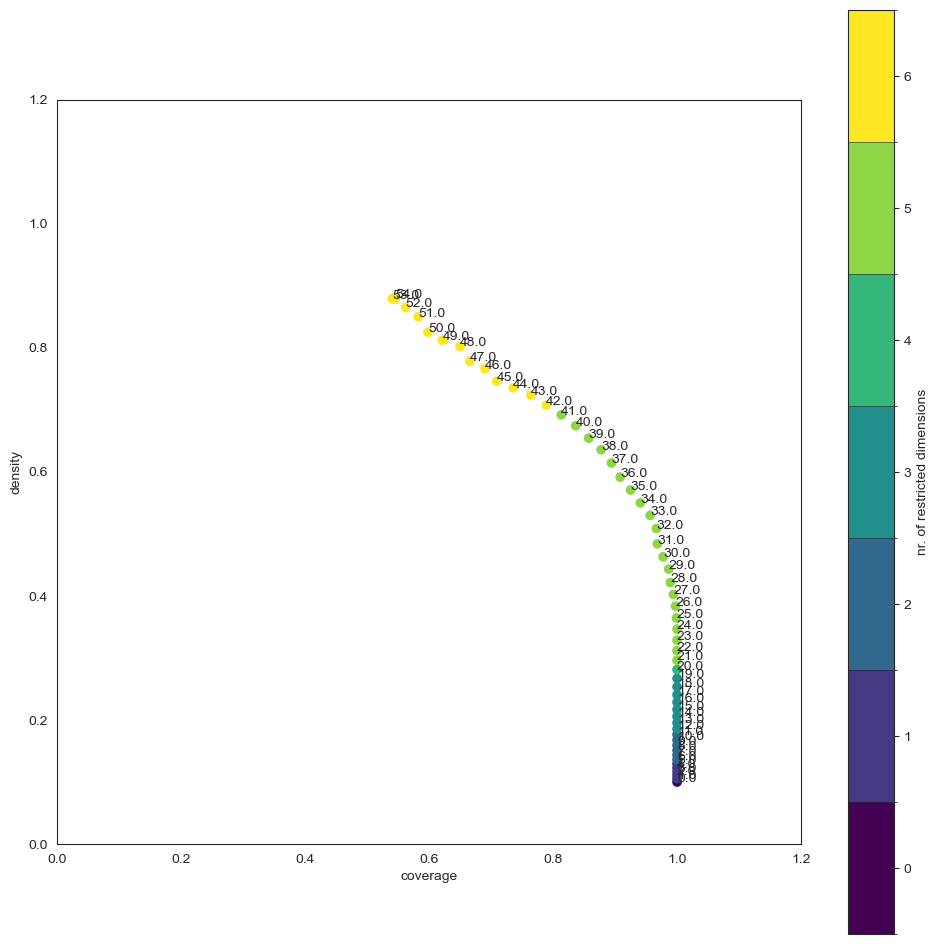

In [152]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

data = outcomes_rfem['Total Costs']

# With continious outcomes, probably the only way to prim is throufh percentile??

y = data < np.percentile(data, 10)

# Initialize PRIM algorithm with the appropriate mode
prim_alg = prim.Prim(experiments_rfem, y, threshold=0.7)
box1 = prim_alg.find_box()

box1.show_tradeoff(annotated=True)
plt.show()

In [163]:
point = 52
box1.inspect(point)

coverage      0.562500
density       0.865385
id           52.000000
k           675.000000
mass          0.065000
mean          0.865385
n           780.000000
res_dim       6.000000
Name: 52, dtype: float64

              box 52                                     
                 min         max       qp value  qp value
A.1_Bmax   30.024222  323.484334            NaN  0.260938
A.5_pfail   0.569407    0.999966  3.631259e-113       NaN
A.3_pfail   0.454373    0.999589   2.044047e-87       NaN
A.2_pfail   0.447306    0.999501   3.440508e-75       NaN
A.1_pfail   0.364054    0.999799   7.868709e-65       NaN
A.4_pfail   0.234588    0.999966   2.103302e-23       NaN



[None]

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2148\811250001.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outcomes = outcomes_df.groupby('policy').mean()
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2148\811250001.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_outcomes = outcomes_df.groupby('policy').std()


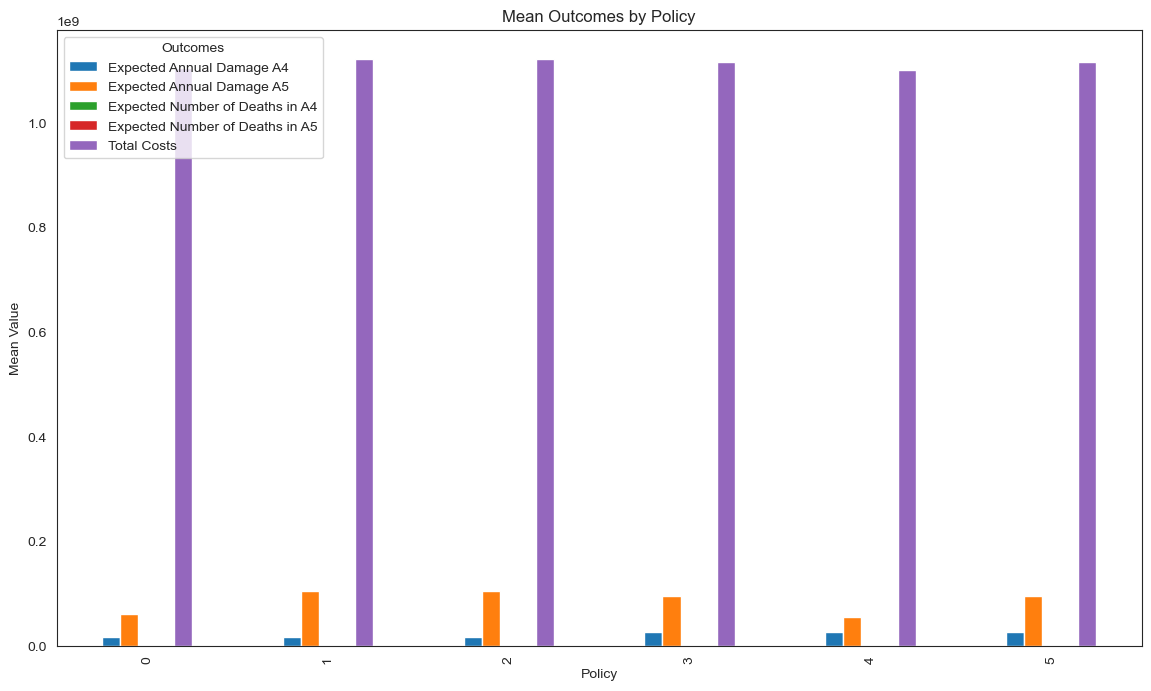

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming outcomes_rfem is a tuple containing a DataFrame and a dictionary
experiments_df, outcomes_dict = rf_em

# Extract the policy data
policies = experiments_df['policy']

# Create a DataFrame from the outcomes dictionary and add the policy column
outcomes_df = pd.DataFrame(outcomes_dict)
outcomes_df['policy'] = policies.values

# Calculate the mean and standard deviation of each outcome for each policy
mean_outcomes = outcomes_df.groupby('policy').mean()
std_outcomes = outcomes_df.groupby('policy').std()

# Plot the mean outcomes against the policies
mean_outcomes.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Outcomes by Policy')
plt.xlabel('Policy')
plt.ylabel('Mean Value')
plt.legend(title='Outcomes')
plt.show()


In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming outcomes_rfem is a tuple containing a DataFrame and a dictionary
experiments_df, outcomes_dict = rf_em

# Extract the policy data
policies = experiments_df['policy']

# Create a DataFrame from the outcomes dictionary and add the policy column
outcomes_df = pd.DataFrame(outcomes_dict)
outcomes_df['policy'] = policies.values

# Calculate the mean and standard deviation of each outcome for each policy
mean_outcomes = outcomes_df.groupby('policy').mean()
std_outcomes = outcomes_df.groupby('policy').std()

# Plot the mean outcomes for each policy separately
for outcome in mean_outcomes.columns:
    plt.figure(figsize=(10, 6))
    mean_outcomes[outcome].plot(kind='bar')
    plt.title(f'Mean {outcome} by Policy')
    plt.xlabel('Policy')
    plt.ylabel(f'Mean {outcome}')
    plt.show()

# Plot the standard deviation outcomes for each policy separately
for outcome in std_outcomes.columns:
    plt.figure(figsize=(10, 6))
    std_outcomes[outcome].plot(kind='bar')
    plt.title(f'Standard Deviation of {outcome} by Policy')
    plt.xlabel('Policy')
    plt.ylabel(f'Standard Deviation of {outcome}')
    plt.show()

# Plot boxplots for each outcome grouped by policy
for outcome in outcomes_df.columns[:-1]:  # Exclude the 'policy' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='policy', y=outcome, data=outcomes_df)
    plt.title(f'Boxplot of {outcome} by Policy')
    plt.xlabel('Policy')
    plt.ylabel(outcome)
    plt.show()

# Plot histograms for each outcome grouped by policy
for outcome in outcomes_df.columns[:-1]:  # Exclude the 'policy' column
    plt.figure(figsize=(10, 6))
    for policy in outcomes_df['policy'].unique():
        subset = outcomes_df[outcome][outcomes_df['policy'] == policy]
        sns.histplot(subset, kde=True, label=f'Policy


SyntaxError: unterminated string literal (detected at line 51) (3018658762.py, line 51)